In [3]:
import os
print(os.getcwd())

C:\Users\Light


In [4]:
os.chdir("C:/Users/Light/OneDrive/Documents")

In [5]:
import pandas as pd

df = pd.read_csv("med.events.csv")  
pd.set_option("display.max_rows", None) 
pd.set_option("display.max_columns", None) 

print(df)  

      PATIENT_ID        DATE  PERDAY CATEGORY  DURATION
0              1  04/26/2033       4     medA        50
1              1  07/04/2033       4     medB        30
2              1  08/03/2033       4     medB        30
3              1  08/17/2033       4     medB        30
4              1  10/13/2033       4     medB        30
5              1  10/16/2033       4     medB        30
6              1  11/23/2033       4     medB        30
7              1  01/19/2034       4     medB        30
8              1  02/08/2034       4     medB        30
9              1  03/08/2034       4     medB        30
10             1  04/08/2034       4     medB        30
11             1  05/10/2034       2     medB        30
12             1  05/29/2034       2     medB        30
13             1  06/28/2034       2     medB        30
14             1  07/19/2034       2     medB        30
15             1  08/31/2034       2     medB        30
16             1  09/14/2034       2     medB   

In [6]:
import pandas as pd

df = pd.read_csv("med.events.csv")

df["DATE"] = pd.to_datetime(df["DATE"])

df = df.sort_values(by=["PATIENT_ID", "DATE"])

df["prev_DATE"] = df.groupby("PATIENT_ID")["DATE"].shift(1)  
df["event_interval"] = (df["DATE"] - df["prev_DATE"]).dt.days  

df = df.dropna(subset=["event_interval"])

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.colheader_justify', 'left')  

df = df.drop(columns=["event_interval"])  
print(df)  



      PATIENT_ID DATE        PERDAY CATEGORY  DURATION prev_DATE 
1       1        2033-07-04   4      medB      30      2033-04-26
2       1        2033-08-03   4      medB      30      2033-07-04
3       1        2033-08-17   4      medB      30      2033-08-03
4       1        2033-10-13   4      medB      30      2033-08-17
5       1        2033-10-16   4      medB      30      2033-10-13
6       1        2033-11-23   4      medB      30      2033-10-16
7       1        2034-01-19   4      medB      30      2033-11-23
8       1        2034-02-08   4      medB      30      2034-01-19
9       1        2034-03-08   4      medB      30      2034-02-08
10      1        2034-04-08   4      medB      30      2034-03-08
11      1        2034-05-10   2      medB      30      2034-04-08
12      1        2034-05-29   2      medB      30      2034-05-10
13      1        2034-06-28   2      medB      30      2034-05-29
14      1        2034-07-19   2      medB      30      2034-06-28
15      1 

In [12]:
print("\nEvent Intervals:")
print(df["event_interval"])


Event Intervals:
1        69.0
690      10.0
692      28.0
693      61.0
694      18.0
695      72.0
696      45.0
697      68.0
698      53.0
699      49.0
700      66.0
701      57.0
689      72.0
702      44.0
704      48.0
706      78.0
708      19.0
709      29.0
711      11.0
712      40.0
714      21.0
715      18.0
716      71.0
720      92.0
721      77.0
703      36.0
722      94.0
688      80.0
686      20.0
661      17.0
662      77.0
663      21.0
664      40.0
665      13.0
666      27.0
667      47.0
668       4.0
669      49.0
670      14.0
672      33.0
687       3.0
673     105.0
675      81.0
676      18.0
677      33.0
678      31.0
679      55.0
680      17.0
681       7.0
682      49.0
683       5.0
684      19.0
685      31.0
674      36.0
660      90.0
723      66.0
725      95.0
769      70.0
770      36.0
771      74.0
772     108.0
773      18.0
774      31.0
775      51.0
776      37.0
778      36.0
779       5.0
780      93.0
768     104.0
781     105.0
78

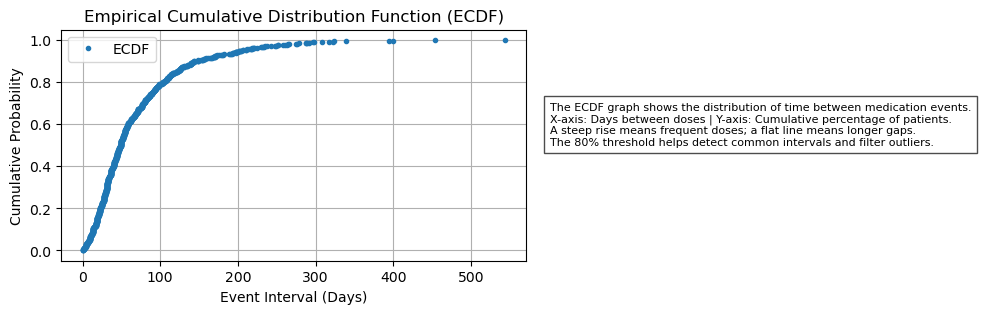

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

df = pd.read_csv("med.events.csv")

df["DATE"] = pd.to_datetime(df["DATE"])

df = df.sort_values(by=["PATIENT_ID", "DATE"])

df["prev_DATE"] = df.groupby("PATIENT_ID")["DATE"].shift(1)
df["event_interval"] = (df["DATE"] - df["prev_DATE"]).dt.days
df = df.dropna(subset=["event_interval"]) 

ecdf = ECDF(df["event_interval"])

plt.figure(figsize=(6, 3))
plt.plot(ecdf.x, ecdf.y, marker=".", linestyle="none", label="ECDF")
plt.xlabel("Event Interval (Days)")
plt.ylabel("Cumulative Probability")
plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.grid()
plt.legend()


text = (
    "The ECDF graph shows the distribution of time between medication events.\n"
    "X-axis: Days between doses | Y-axis: Cumulative percentage of patients.\n"
    "A steep rise means frequent doses; a flat line means longer gaps.\n"
    "The 80% threshold helps detect common intervals and filter outliers."
)

plt.text(1.05, 0.5, text, transform=plt.gca().transAxes, fontsize=8,
         bbox=dict(facecolor='white', alpha=0.7))

plt.show()

C:\Users\Light\AppData\Local\Temp\ipykernel_32844\3292811156.py:47: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=df["Cluster"], y=df["event_interval"], jitter=True, palette="viridis", alpha=0.7)
C:\Users\Light\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Light\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


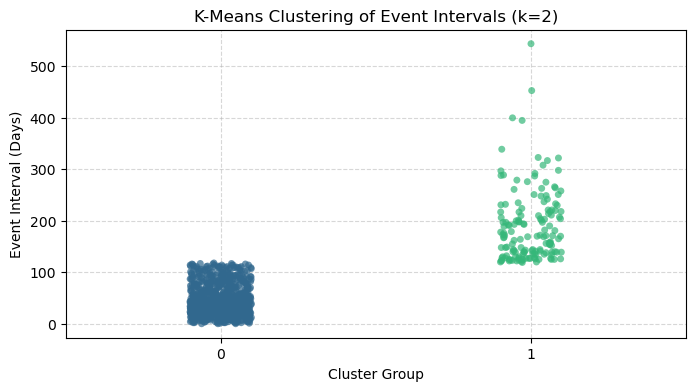

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import os
os.environ["OMP_NUM_THREADS"] = "4"
# Load dataset
df = pd.read_csv("med.events.csv")

# Convert DATE column to datetime and sort by patient and date
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.sort_values(by=["PATIENT_ID", "DATE"])

# Compute event intervals
df["prev_DATE"] = df.groupby("PATIENT_ID")["DATE"].shift(1)
df["event_interval"] = (df["DATE"] - df["prev_DATE"]).dt.days
df = df.dropna(subset=["event_interval"])

# Reshape for clustering
X = df["event_interval"].values.reshape(-1, 1)

# Find best k using silhouette score
best_k = 2
best_score = -1

for k in range(2, 5):  # Testing k = 2, 3, 4
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    
    if score > best_score:
        best_k = k
        best_score = score

# Apply k-means clustering
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# Sort dataframe for better visualization
df = df.sort_values(by="Cluster")

# Create a cleaner strip plot
plt.figure(figsize=(8, 4))
sns.stripplot(x=df["Cluster"], y=df["event_interval"], jitter=True, palette="viridis", alpha=0.7)
plt.xlabel("Cluster Group")
plt.ylabel("Event Interval (Days)")
plt.title(f"K-Means Clustering of Event Intervals (k={best_k})")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

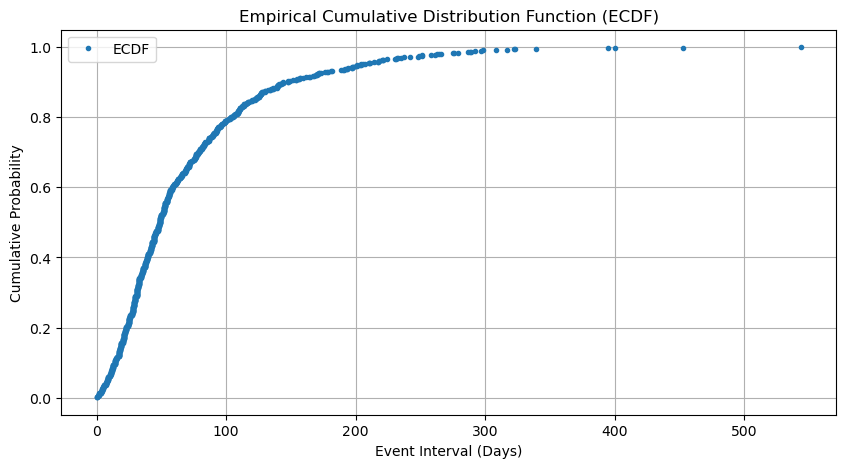

80% of the data falls below: 104.0 days
      PATIENT_ID DATE        PERDAY CATEGORY  DURATION prev_DATE   \
1       1        2033-07-04   4      medB      30      2033-04-26   
2       1        2033-08-03   4      medB      30      2033-07-04   
3       1        2033-08-17   4      medB      30      2033-08-03   
4       1        2033-10-13   4      medB      30      2033-08-17   
5       1        2033-10-16   4      medB      30      2033-10-13   
6       1        2033-11-23   4      medB      30      2033-10-16   
7       1        2034-01-19   4      medB      30      2033-11-23   
8       1        2034-02-08   4      medB      30      2034-01-19   
9       1        2034-03-08   4      medB      30      2034-02-08   
10      1        2034-04-08   4      medB      30      2034-03-08   
11      1        2034-05-10   2      medB      30      2034-04-08   
12      1        2034-05-29   2      medB      30      2034-05-10   
13      1        2034-06-28   2      medB      30      2034-05-

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

df = pd.read_csv("med.events.csv")

df["DATE"] = pd.to_datetime(df["DATE"])

df = df.sort_values(by=["PATIENT_ID", "DATE"])

df["prev_DATE"] = df.groupby("PATIENT_ID")["DATE"].shift(1)
df["event_interval"] = (df["DATE"] - df["prev_DATE"]).dt.days
df = df.dropna(subset=["event_interval"])  # Remove NaN values

ecdf = ECDF(df["event_interval"])

plt.figure(figsize=(10, 5))
plt.plot(ecdf.x, ecdf.y, marker=".", linestyle="none", label="ECDF")
plt.xlabel("Event Interval (Days)")
plt.ylabel("Cumulative Probability")
plt.title("Empirical Cumulative Distribution Function (ECDF)")
plt.grid()
plt.legend()
plt.show()

threshold_80 = np.percentile(df["event_interval"], 80)
print(f"80% of the data falls below: {threshold_80} days")

df_filtered = df[df["event_interval"] <= threshold_80]

print(df_filtered)